In [432]:
import astropy.time
import numpy as np
import pandas as pd
import sp3

# Define the start and end times
start_time = astropy.time.Time('2022-12-31T00:00:00', scale='utc')
end_time = astropy.time.Time('2023-01-02T23:59:59', scale='utc')

# Create a range of times every 5 minutes
delta_t = 5 * 60  # 5 minutes in seconds
obstime = astropy.time.Time(np.arange(start_time.jd, end_time.jd, delta_t / 86400.0), format='jd', scale='utc')

# Download and interpolate the SP3 data
itrs_positions = sp3.itrs(
    # id=sp3.Sp3Id("G11"),
    id = sp3.NoradId(27663),
    obstime=obstime,
    download_directory="sp3_cache",
    window=5,
    degree=10
)

# Convert ITRS to GCRS
gcrs_positions = itrs_positions.transform_to(coord.GCRS(obstime=obstime))

# Create a DataFrame
navstar_46_sp3_ephem = pd.DataFrame({
    "utc": obstime.utc.iso,
    "x": gcrs_positions.cartesian.x.value,
    "y": gcrs_positions.cartesian.y.value,
    "z": gcrs_positions.cartesian.z.value
})


In [433]:
print(navstar_46_sp3_ephem.head())

                       utc             x             y             z
0  2022-12-31 00:00:00.000 -5.219171e+06  2.418024e+07 -1.057229e+07
1  2022-12-31 00:05:00.000 -5.834988e+06  2.366557e+07 -1.139203e+07
2  2022-12-31 00:10:00.000 -6.440060e+06  2.310732e+07 -1.219079e+07
3  2022-12-31 00:15:00.000 -7.033275e+06  2.250652e+07 -1.296710e+07
4  2022-12-31 00:20:00.000 -7.613544e+06  2.186429e+07 -1.371953e+07


In [7]:
#move back to the root directory
import os
os.chdir('..')

In [305]:
!pwd

/Users/charlesc/Documents/GitHub/ERP_tools


In [434]:

import spacetrack.operators as op
from spacetrack import SpaceTrackClient
import getpass
from datetime import datetime, timedelta
startdate = datetime(2022, 12, 28, 0, 00, 00, 00000)
# Extending collection duration to test data availability
duration_days = 8  # days
enddate = startdate + timedelta(days=duration_days)

identity_st = input('Enter SpaceTrack username: ')
password_st = getpass.getpass(prompt=f'Enter SpaceTrack password for account {identity_st}: ')

st = SpaceTrackClient(identity=identity_st, password=password_st)

try:
    rawTles = st.tle(norad_cat_id=27663, epoch=op.inclusive_range(startdate, enddate),
                     orderby='epoch asc', format='tle')
    if rawTles:
        print("rawTles: ", rawTles)
    else:
        print("No TLE data found for the specified range.")
except Exception as e:
    print(f"An error occurred: {e}")



rawTles:  1 27663U 03005A   22362.46139660 -.00000026  00000-0  00000-0 0  9991
2 27663  55.3865 265.3534 0130653  42.1547 133.1315  2.00553102145901
1 27663U 03005A   22363.46562897 -.00000034  00000-0  00000-0 0  9993
2 27663  55.3859 265.3134 0130694  42.1740 138.1818  2.00553060145928
1 27663U 03005A   22363.74814245 -.00000035  00000-0  00000-0 0  9992
2 27663  55.3857 265.3022 0130705  42.1805 342.1537  2.00553049145930
1 27663U 03005A   22365.45466911 -.00000032  00000-0  00000-0 0  9992
2 27663  55.3846 265.2342 0130771  42.2117 134.2576  2.00552986145967
1 27663U 03005A   22365.71611638 -.00000031  00000-0  00000-0 0  9998
2 27663  55.3845 265.2238 0130782  42.2170 323.0207  2.00552976145970
1 27663U 03005A   23001.46855042 -.00000024  00000-0  00000-0 0  9999
2 27663  55.3840 265.1939 0130810  42.2301 146.2748  2.00552951145989
1 27663U 03005A   23001.71400122 -.00000022  00000-0  00000-0 0  9990
2 27663  55.3838 265.1841 0130821  42.2349 323.4886  2.00552941145994
1 27663U 0

In [435]:
from collections import OrderedDict

# Split the raw string by newlines
tle_lines = rawTles.strip().split('\n')

# Group every two lines to form individual TLEs
tle_list = ['\n'.join(tle_lines[i:i+2]) for i in range(0, len(tle_lines), 2)]

tle_list = list(OrderedDict.fromkeys(tle_list))

print(tle_list)

['1 27663U 03005A   22362.46139660 -.00000026  00000-0  00000-0 0  9991\n2 27663  55.3865 265.3534 0130653  42.1547 133.1315  2.00553102145901', '1 27663U 03005A   22363.46562897 -.00000034  00000-0  00000-0 0  9993\n2 27663  55.3859 265.3134 0130694  42.1740 138.1818  2.00553060145928', '1 27663U 03005A   22363.74814245 -.00000035  00000-0  00000-0 0  9992\n2 27663  55.3857 265.3022 0130705  42.1805 342.1537  2.00553049145930', '1 27663U 03005A   22365.45466911 -.00000032  00000-0  00000-0 0  9992\n2 27663  55.3846 265.2342 0130771  42.2117 134.2576  2.00552986145967', '1 27663U 03005A   22365.71611638 -.00000031  00000-0  00000-0 0  9998\n2 27663  55.3845 265.2238 0130782  42.2170 323.0207  2.00552976145970', '1 27663U 03005A   23001.46855042 -.00000024  00000-0  00000-0 0  9999\n2 27663  55.3840 265.1939 0130810  42.2301 146.2748  2.00552951145989', '1 27663U 03005A   23001.71400122 -.00000022  00000-0  00000-0 0  9990\n2 27663  55.3838 265.1841 0130821  42.2349 323.4886  2.00552941

In [436]:
import orekit
from orekit.pyhelpers import setup_orekit_curdir, datetime_to_absolutedate
from datetime import datetime, timedelta

# orekit.pyhelpers.download_orekit_data_curdir()
vm = orekit.initVM()
setup_orekit_curdir("misc/orekit-data.zip")

from org.orekit.frames import FramesFactory, ITRFVersion
from org.orekit.utils import PVCoordinates
from org.hipparchus.geometry.euclidean.threed import Vector3D
from org.orekit.utils import PVCoordinates, IERSConventions
from org.orekit.orbits import KeplerianOrbit, CartesianOrbit
from org.orekit.forces import ForceModel, BoxAndSolarArraySpacecraft, Panel
from org.orekit.propagation import SpacecraftState
from org.orekit.utils import Constants

import numpy as np
import pandas as pd
from datetime import datetime, timedelta, timezone

def TEME_to_EME2000(teme_pos, teme_vel, mjds):
    # Orekit Frames
    frame_TEME = FramesFactory.getTEME()
    frame_EME2000 = FramesFactory.getEME2000()

    # Prepare output arrays
    eme2000_pos = np.empty_like(teme_pos)
    eme2000_vel = np.empty_like(teme_vel)

    # Iterate over each row of position, velocity, and corresponding MJD
    for i in range(len(teme_pos)):
        # Convert MJD to Julian Date and then to UTC datetime
        mjd = mjds.iloc[i]
        jd = mjd + 2400000.5
        base_date = datetime(1858, 11, 17, tzinfo=timezone.utc)
        
        # Convert to datetime
        dt = base_date + timedelta(days=(jd - 2400000.5))
        
        # Convert datetime to AbsoluteDate
        absolute_date = datetime_to_absolutedate(dt)

        # Convert inputs to Orekit's Vector3D and PVCoordinates (and convert from km to m)
        teme_pos_vector = Vector3D(float(teme_pos[i, 0] * 1000), float(teme_pos[i, 1] * 1000), float(teme_pos[i, 2] * 1000))
        teme_vel_vector = Vector3D(float(teme_vel[i, 0] * 1000), float(teme_vel[i, 1] * 1000), float(teme_vel[i, 2] * 1000))
        pv_teme = PVCoordinates(teme_pos_vector, teme_vel_vector)

        # Transform Coordinates from TEME to EME2000
        teme_to_eme2000 = frame_TEME.getTransformTo(frame_EME2000, absolute_date)
        pv_eme2000 = teme_to_eme2000.transformPVCoordinates(pv_teme)

        # Extract position and velocity from transformed coordinates and convert back from m to km
        eme2000_pos[i] = np.array([pv_eme2000.getPosition().getX(), pv_eme2000.getPosition().getY(), pv_eme2000.getPosition().getZ()]) / 1000
        eme2000_vel[i] = np.array([pv_eme2000.getVelocity().getX(), pv_eme2000.getVelocity().getY(), pv_eme2000.getVelocity().getZ()]) / 1000

    return eme2000_pos, eme2000_vel

from datetime import datetime, timedelta, timezone
from sgp4.api import Satrec
from typing import Dict, List, Union, Tuple, Any 

def sgp4_prop_TLE(TLE: str, jd_start: float, jd_end: float, dt: float, alt_series: bool = False) -> List[List[Any]]:
    """
    Given a TLE, a start time, end time, and time step, propagate the TLE and return the time-series of Cartesian coordinates and accompanying time-stamps (MJD).
    
    This is simply a wrapper for the SGP4 routine in the sgp4.api package (Brandon Rhodes).

    Parameters
    ----------
    TLE : str
        TLE to be propagated.
    jd_start : float
        Start time of propagation in Julian Date format.
    jd_end : float
        End time of propagation in Julian Date format.
    dt : float
        Time step of propagation in seconds.
    alt_series : bool, optional
        If True, return the altitude series as well as the position series. Defaults to False.

    Returns
    -------
    list
        List of lists containing the time-series of Cartesian coordinates, and accompanying time-stamps (MJD).
    """
    if jd_start > jd_end:
        print('jd_start must be less than jd_end')
        return

    ephemeris = []
    
    #convert dt from seconds to julian day
    dt_jd = dt/86400

    #split at the new line
    split_tle = TLE.split('\n')
    s = split_tle[0]
    r = split_tle[1]

    fr = 0.0 # precise fraction (SGP4 docs for more info)
    
    #create a satellite object
    satellite = Satrec.twoline2rv(s, r)

    time = jd_start
    # for i in range (jd_start, jd_end, dt):
    while time < jd_end:
        # propagate the satellite to the next time step
        # Position is in idiosyncratic True Equator Mean Equinox coordinate frame used by SGP4
        # Velocity is the rate at which the position is changing, expressed in kilometers per second
        error, position, velocity = satellite.sgp4(time, fr)
        if error != 0:
            print('Satellite position could not be computed for the given date')
            break
        else:
            ephemeris.append([time,position, velocity]) #jd time, pos, vel
        time += dt_jd

    return ephemeris

def TLE_time(TLE: str) -> float:
    """
    Find the time of a TLE in Julian Day format.

    Parameters
    ----------
    TLE : str
        The TLE string.

    Returns
    -------
    float
        Time in Julian Day format.
    """
    # Extract the epoch section of the TLE
    epoch = TLE[18:32]
    # Convert the first two digits of the epoch to the year
    year = 2000 + int(epoch[0:2])
    
    # The rest of the digits are the day of the year and fractional portion of the day
    day = float(epoch[2:])
    # Convert the day of the year to a day, month, year format
    # Calculate the whole day and the fraction of the day separately
    whole_day = int(day)
    day_fraction = day - whole_day
    # Add the whole days to the first day of the year
    date = datetime(year, 1, 1) + timedelta(days=whole_day - 1)
    # Add the day fraction in terms of seconds (day fraction multiplied by the number of seconds in a day)
    date += timedelta(seconds=day_fraction * 86400)
    # Convert the date to a Julian date
    jd = (date - datetime(1858, 11, 17)).total_seconds() / 86400.0 + 2400000.5
    return jd

def combine_TLE2eph(TLE_list: List[str], jd_start: float, jd_stop: float, dt: float = 60) -> Tuple[List[Any], List[Any]]:
    dt_jd = dt / 86400
    current_jd = jd_start
    ephemeris = []
    orbit_ages = []

    # Iterate through the TLE list
    for i in range(len(TLE_list)):
        TLE_jd = TLE_time(TLE_list[i])
        # If it's the last TLE, we can't fetch the next TLE's JD straightforwardly
        if i < len(TLE_list) - 1:
            next_TLE_jd = TLE_time(TLE_list[i + 1])
        else:
            # If there's no next TLE, use jd_stop as the next TLE's JD for the last iteration
            next_TLE_jd = jd_stop

        # Process ephemeris only if the current JD is within the range of the current TLE's JD and the next one
        while current_jd < next_TLE_jd and current_jd < jd_stop:
            eph = sgp4_prop_TLE(TLE_list[i], current_jd, min(current_jd + dt_jd, jd_stop), dt)
            ephemeris.extend(eph)
            hours_orbit_age = (current_jd - TLE_jd) * 24
            orbit_ages.append(hours_orbit_age)
            current_jd += dt_jd
            if current_jd >= jd_stop:
                break

    return ephemeris, orbit_ages

from astropy.time import Time
def utc_to_jd(utc_time: datetime) -> float:
    """
    Convert UTC time (datetime object) to Julian Date using Astropy,
    rounding to the nearest full second to avoid timing errors.

    Parameters
    ----------
    utc_time : datetime
        UTC time tag.

    Returns
    -------
    float
        Julian Date.
    """
    # Round the input datetime to the nearest full second
    if utc_time.microsecond >= 500000:
        rounded_utc_time = utc_time + datetime.timedelta(seconds=1)
        rounded_utc_time = rounded_utc_time.replace(microsecond=0)
    else:
        rounded_utc_time = utc_time.replace(microsecond=0)

    # Convert the rounded datetime object to Astropy Time object
    time = Time(rounded_utc_time, format='datetime', scale='utc', precision=9)

    # Convert to Julian Date
    jd = time.jd
    return jd

def mjd_to_utc(mjd: float) -> datetime:
    """
    Convert Modified Julian Date to UTC time tag (datetime object) using Astropy.

    Parameters
    ----------
    mjd : float
        Modified Julian Date.

    Returns
    -------
    datetime
        UTC time tag.
    """
    #convert mjd to astropy time object
    time = Time(mjd, format='mjd', scale='utc', precision=9)
    #convert astropy time object to datetime object
    utc = time.datetime
    return utc

In [437]:
jd_start = utc_to_jd(datetime(2022, 12, 29, 0, 0, 0))
jd_end = utc_to_jd(datetime(2023, 1, 2, 0, 0, 0))

navstar46TLE_eph = combine_TLE2eph(tle_list, jd_start, jd_end, dt=60*5)

teme_pos = np.array([item[1] for item in navstar46TLE_eph[0]])
teme_vel = np.array([item[2] for item in navstar46TLE_eph[0]])
jds = pd.Series([item[0] for item in navstar46TLE_eph[0]])
mjds = jds - 2400000.5

TLE_utc_times = [mjd_to_utc(mjd) for mjd in mjds]

eme2000_pos_TLE, eme2000_vel_TLE = TEME_to_EME2000(teme_pos, teme_vel, mjds)

# Create a DataFrame called navstar_46_TLE_ephem
navstar_46_TLE_ephem = pd.DataFrame({
    "utc": TLE_utc_times,
    "x_TLE": eme2000_pos_TLE[:, 0],
    "y_TLE": eme2000_pos_TLE[:, 1],
    "z_TLE": eme2000_pos_TLE[:, 2]
})


In [438]:
navstar_46_sp3_ephem

,utc,x,y,z
0,2022-12-31 00:00:00.000,-5.219171e+06,2.418024e+07,-1.057229e+07
1,2022-12-31 00:05:00.000,-5.834988e+06,2.366557e+07,-1.139203e+07
2,2022-12-31 00:10:00.000,-6.440060e+06,2.310732e+07,-1.219079e+07
3,2022-12-31 00:15:00.000,-7.033275e+06,2.250652e+07,-1.296710e+07
4,2022-12-31 00:20:00.000,-7.613544e+06,2.186429e+07,-1.371953e+07
...,...,...,...,...
859,2023-01-02 23:34:59.985,-3.527671e+06,2.531287e+07,-8.359595e+06
860,2023-01-02 23:39:59.985,-4.166854e+06,2.491688e+07,-9.226676e+06
861,2023-01-02 23:44:59.985,-4.798353e+06,2.447495e+07,-1.007674e+07
862,2023-01-02 23:49:59.985,-5.421010e+06,2.398792e+07,-1.090823e+07


In [439]:
navstar_46_TLE_ephem

,utc,x_TLE,y_TLE,z_TLE
0,2022-12-29 00:00:00.000000,-4243.622372,24908.778967,-9212.321860
1,2022-12-29 00:04:59.999982,-4873.719251,24465.339576,-10062.676759
2,2022-12-29 00:09:59.999964,-5494.834293,23976.811265,-10894.483019
3,2022-12-29 00:14:59.999946,-6105.827255,23444.113823,-11706.216172
4,2022-12-29 00:19:59.999928,-6705.576740,22868.244516,-12496.388538
...,...,...,...,...
1148,2023-01-01 23:39:59.979472,-3671.572502,25235.907265,-8531.811336
1149,2023-01-01 23:44:59.979454,-4309.041584,24830.337710,-9395.659401
1150,2023-01-01 23:49:59.979436,-4938.566619,24378.990719,-10242.182470
1151,2023-01-01 23:54:59.979419,-5558.991536,23882.720765,-11069.828971


In [440]:
# Ensure the 'utc' columns are datetime
navstar_46_sp3_ephem['utc'] = pd.to_datetime(navstar_46_sp3_ephem['utc'])
navstar_46_TLE_ephem['utc'] = pd.to_datetime(navstar_46_TLE_ephem['utc'])

# Sort the DataFrames by the 'utc' column if not already sorted
navstar_46_sp3_ephem = navstar_46_sp3_ephem.sort_values('utc')
navstar_46_TLE_ephem = navstar_46_TLE_ephem.sort_values('utc')

merged_df = pd.merge_asof(navstar_46_sp3_ephem, navstar_46_TLE_ephem, on='utc', suffixes=('', '_TLE'))


In [441]:
#divide x, y, z by 1000 to convert from meters to kilometers
merged_df['x'] = merged_df['x'] / 1000
merged_df['y'] = merged_df['y'] / 1000
merged_df['z'] = merged_df['z'] / 1000

merged_df.head()

,utc,x,y,z,x_TLE,y_TLE,z_TLE
0,2022-12-31 00:00:00,-5219.170676,24180.244752,-10572.290745,-5218.584571,24180.882310,-10571.123353
1,2022-12-31 00:05:00,-5834.988472,23665.572386,-11392.031526,-5834.402099,23666.249313,-11390.893968
2,2022-12-31 00:10:00,-6440.060048,23107.315261,-12190.787766,-6439.474587,23108.030242,-12189.682173
3,2022-12-31 00:15:00,-7033.274938,22506.515501,-12967.095494,-7032.691555,22507.267095,-12966.023892
4,2022-12-31 00:20:00,-7613.544308,21864.289872,-13719.531313,-7612.964142,21865.076527,-13718.495612


In [442]:
# Calculate the norm for SP3 position vectors
merged_df['sp3_norm'] = np.sqrt(merged_df['x']**2 + merged_df['y']**2 + merged_df['z']**2)

# Calculate the norm for TLE position vectors
merged_df['TLE_norm'] = np.sqrt(merged_df['x_TLE']**2 + merged_df['y_TLE']**2 + merged_df['z_TLE']**2)

In [444]:
# Calculate the 3D RMS for each row and add it as a new column
merged_df['3Drms'] = np.sqrt(((merged_df['x'] - merged_df['x_TLE']) ** 2 +
                                     (merged_df['y'] - merged_df['y_TLE']) ** 2 +
                                     (merged_df['z'] - merged_df['z_TLE']) ** 2) / 3)

# Display the updated DataFrame with the 3Drms column
print(merged_df)

print(f"columns in merged_ephemeris: {merged_df.columns}")

                        utc            x  ...      TLE_norm        3Drms
0   2022-12-31 00:00:00.000 -5219.170676  ...  26901.623430     0.839206
1   2022-12-31 00:05:00.000 -5834.988472  ...  26905.093752     0.835883
2   2022-12-31 00:10:00.000 -6440.060048  ...  26907.921623     0.831925
3   2022-12-31 00:15:00.000 -7033.274938  ...  26910.102158     0.827358
4   2022-12-31 00:20:00.000 -7613.544308  ...  26911.631620     0.822211
..                      ...          ...  ...           ...          ...
859 2023-01-02 23:34:59.985 -3527.671252  ...  26907.142632  2782.850595
860 2023-01-02 23:39:59.985 -4166.853529  ...  26907.142632  2122.322050
861 2023-01-02 23:44:59.985 -4798.352893  ...  26907.142632  1460.927156
862 2023-01-02 23:49:59.985 -5421.009518  ...  26907.142632   798.966340
863 2023-01-02 23:54:59.985 -6033.680366  ...  26907.142632   136.872554

[864 rows x 10 columns]
columns in merged_ephemeris: Index(['utc', 'x', 'y', 'z', 'x_TLE', 'y_TLE', 'z_TLE', 'sp3_norm', 'T

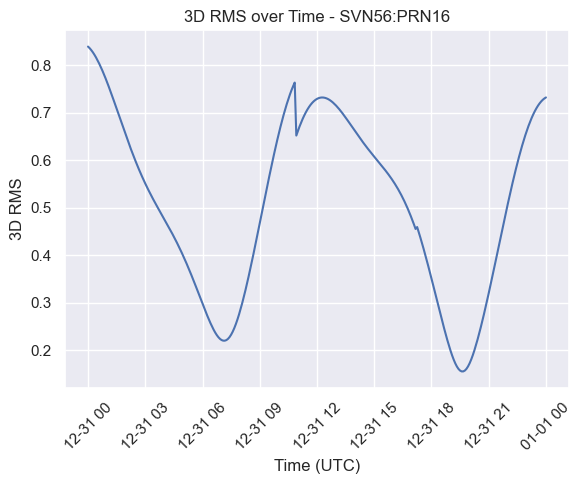

In [453]:
filtered_df = merged_df[merged_df['utc'] <= '2023-01-01 00:00:00']

import seaborn as sns
import matplotlib.pyplot as plt

# Apply the default Seaborn theme
sns.set_theme()

# Plotting the data
plt.figure(figsize=(6, 5))
plt.plot(filtered_df['utc'], filtered_df['3Drms'])
plt.xlabel('Time (UTC)')
plt.ylabel('3D RMS')
plt.title('3D RMS over Time - SVN56:PRN16')
plt.xticks(rotation=45)  # Rotate x-labels by 45 degrees

# Show the plot
plt.tight_layout()  # Adjust layout to not cut off labels
plt.show()

In [446]:

import plotly.graph_objects as go
# Calculating altitude (assuming Earth's radius is approximately 6371 km)
merged_df['altitude'] = np.sqrt(merged_df['x']**2 + merged_df['y']**2 + merged_df['z']**2) - 6371
merged_df['altitude_TLE'] = np.sqrt(merged_df['x_TLE']**2 + merged_df['y_TLE']**2 + merged_df['z_TLE']**2) - 6371

# Creating the plot
fig = go.Figure()

# Plot non-TLE altitude
fig.add_trace(go.Scatter(x=merged_df['utc'], y=merged_df['altitude'],
                         mode='lines', name='Non-TLE Altitude'))

# Plot TLE altitude
fig.add_trace(go.Scatter(x=merged_df['utc'], y=merged_df['altitude_TLE'],
                         mode='lines', name='TLE Altitude'))

# Update layout
fig.update_layout(title='Altitude Time Series Comparison',
                  xaxis_title='UTC',
                  yaxis_title='Altitude (km)',
                  legend_title='Data Source')

fig.show()

/Users/charlesc/anaconda3/envs/erp_tools_env/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [431]:
import plotly.graph_objects as go
import numpy as np

# Your existing code to create orbit plots
trace_sp3 = go.Scatter3d(
    x=merged_df['x'],
    y=merged_df['y'],
    z=merged_df['z'],
    mode='lines',
    name='SP3 Orbit'
)

trace_tle = go.Scatter3d(
    x=merged_df['x_TLE'],
    y=merged_df['y_TLE'],
    z=merged_df['z_TLE'],
    mode='lines',
    name='TLE Orbit'
)

# Create unit vectors
unit_length = 1 # Adjust the length of the unit vectors as needed
origin = [0, 0, 0]

# Unit X Vector
trace_x = go.Scatter3d(
    x=[origin[0], unit_length],
    y=[origin[1], 0],
    z=[origin[2], 0],
    mode='lines',
    name='X Unit Vector',
    line=dict(color='red', width=5)
)

# Unit Y Vector
trace_y = go.Scatter3d(
    x=[origin[0], 0],
    y=[origin[1], unit_length],
    z=[origin[2], 0],
    mode='lines',
    name='Y Unit Vector',
    line=dict(color='green', width=5)
)

# Unit Z Vector
trace_z = go.Scatter3d(
    x=[origin[0], 0],
    y=[origin[1], 0],
    z=[origin[2], unit_length],
    mode='lines',
    name='Z Unit Vector',
    line=dict(color='blue', width=5)
)

# Define the layout of the plot
layout = go.Layout(
    title='3D Orbit Comparison',
    scene=dict(
        xaxis=dict(title='X (km)'),
        yaxis=dict(title='Y (km)'),
        zaxis=dict(title='Z (km)')
    )
)

# Create the figure and add all traces
fig = go.Figure(data=[trace_sp3, trace_tle, trace_x, trace_y, trace_z], layout=layout)

# Show the plot
fig.show()


In [354]:
import numpy as np

def cartesian_to_keplerian(r, v, mu=398600.4418):
    """
    Convert Cartesian coordinates to Keplerian elements.

    Parameters:
    r (array): Position vector [x, y, z] in kilometers.
    v (array): Velocity vector [vx, vy, vz] in kilometers per second.
    mu (float): Standard gravitational parameter in km^3/s^2. Defaults to Earth's mu.

    Returns:
    tuple: (a, e, i, RAAN, argument_of_perigee, true_anomaly) where
        a (float): Semi-major axis in kilometers.
        e (float): Eccentricity.
        i (float): Inclination in radians.
        RAAN (float): Right ascension of the ascending node in radians.
        argument_of_perigee (float): Argument of perigee in radians.
        true_anomaly (float): True anomaly in radians.
    """

    # Calculate specific angular momentum
    h = np.cross(r, v)
    n = np.cross([0, 0, 1], h)

    # Calculate eccentricity vector
    e_vec = (np.cross(v, h) / mu) - (r / np.linalg.norm(r))
    e = np.linalg.norm(e_vec)

    # Calculate semi-major axis
    energy = np.linalg.norm(v)**2 / 2 - mu / np.linalg.norm(r)
    a = -mu / (2 * energy)

    # Calculate inclination
    i = np.rad2deg(np.arccos(h[2] / np.linalg.norm(h)))

    # Calculate right ascension of the ascending node (RAAN)
    RAAN = np.arctan2(n[1], n[0])

    # Correct RAAN for quadrant
    if RAAN < 0:
        RAAN += 2 * np.pi

    # Calculate argument of perigee
    argument_of_perigee = np.arccos(np.dot(n, e_vec) / (np.linalg.norm(n) * e))
    if e_vec[2] < 0:
        argument_of_perigee = 2 * np.pi - argument_of_perigee

    # Calculate true anomaly
    true_anomaly = np.arccos(np.dot(e_vec, r) / (e * np.linalg.norm(r)))
    if np.dot(r, v) < 0:
        true_anomaly = 2 * np.pi - true_anomaly

    return a, e, i, RAAN, argument_of_perigee, true_anomaly


In [355]:
# Add Keplerian element columns to the DataFrame
merged_ephemeris['a_TLE'] = np.nan
merged_ephemeris['e_TLE'] = np.nan
merged_ephemeris['i_TLE'] = np.nan
merged_ephemeris['RAAN_TLE'] = np.nan
merged_ephemeris['argument_of_perigee_TLE'] = np.nan
merged_ephemeris['true_anomaly_TLE'] = np.nan

# Iterate over each row to compute Keplerian elements from TLE position and velocity
for index, row in merged_ephemeris.iterrows():
    r_TLE = np.array([row['x_TLE'], row['y_TLE'], row['z_TLE']])
    v_TLE = np.array([row['xv_TLE'], row['yv_TLE'], row['zv_TLE']])
    a, e, i, RAAN, argument_of_perigee, true_anomaly = cartesian_to_keplerian(r_TLE, v_TLE)

    # Assign the calculated values to the DataFrame
    merged_ephemeris.at[index, 'a_TLE'] = a
    merged_ephemeris.at[index, 'e_TLE'] = e
    merged_ephemeris.at[index, 'i_TLE'] = i
    merged_ephemeris.at[index, 'RAAN_TLE'] = RAAN
    merged_ephemeris.at[index, 'argument_of_perigee_TLE'] = argument_of_perigee
    merged_ephemeris.at[index, 'true_anomaly_TLE'] = true_anomaly


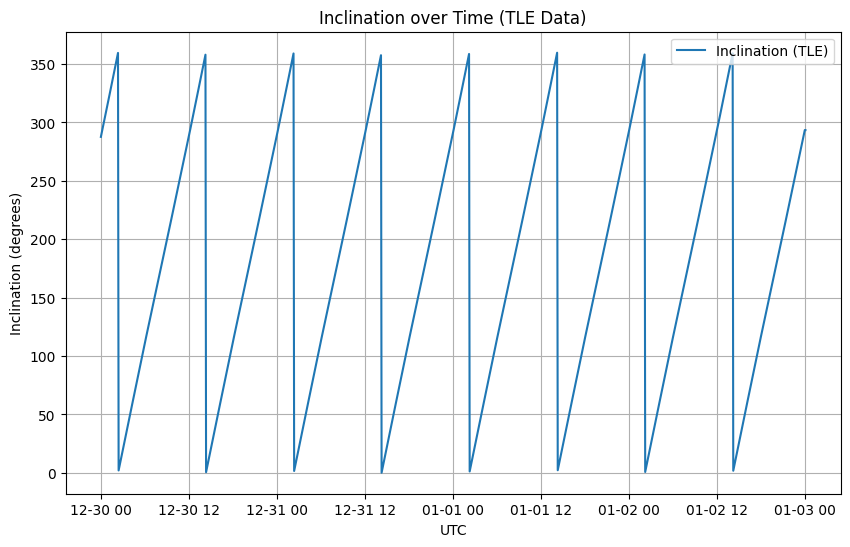

In [356]:


plt.figure(figsize=(10, 6))
plt.plot(merged_ephemeris['UTC'], np.rad2deg(merged_ephemeris['true_anomaly_TLE']), label='Inclination (TLE)')
plt.xlabel('UTC')
plt.ylabel('Inclination (degrees)')
plt.title('Inclination over Time (TLE Data)')
plt.legend()
plt.grid(True)

# Set y-axis to plain format to avoid scientific notation
plt.gca().ticklabel_format(style='plain', useOffset=False, axis='y')

plt.show()